In [1]:
# Install necessary packages
!pip install opendatasets
!pip install torch torchvision
!pip install matplotlib

# Download the dataset

In [2]:
import opendatasets as od

# Download the dataset from Kaggle
dataset_url = "https://www.kaggle.com/datasets/alistairking/recyclable-and-household-waste-classification"
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: melissashort13
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/alistairking/recyclable-and-household-waste-classification


100%|██████████| 920M/920M [00:31<00:00, 30.7MB/s]


# Visualize sample images

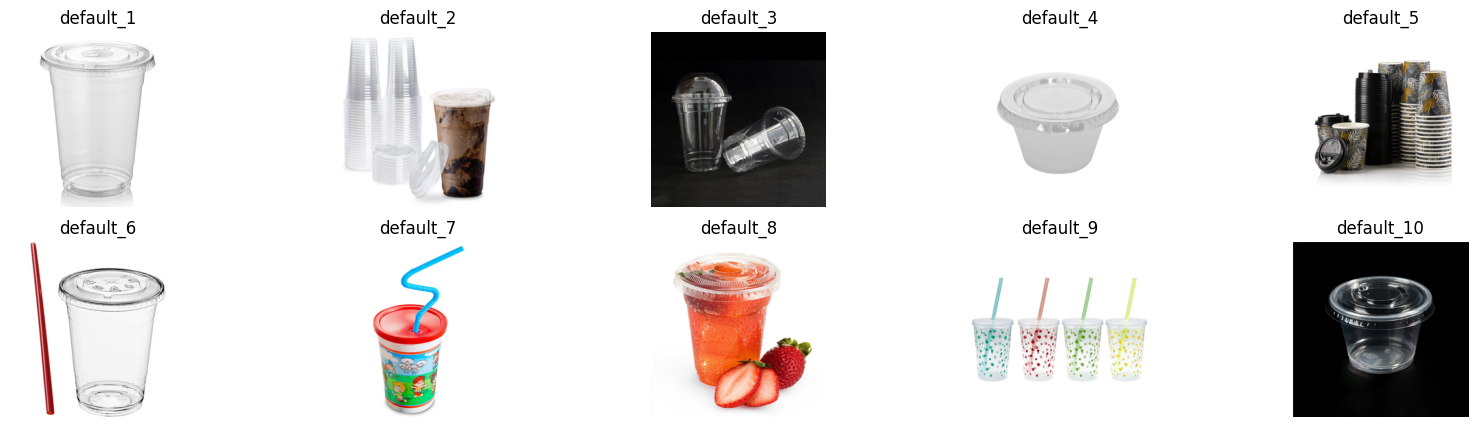

In [3]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Define the path to the main images folder
image_folder = '/content/recyclable-and-household-waste-classification/images'

# Traverse the subdirectories and list images
image_paths = []
for root, dirs, files in os.walk(image_folder):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_paths.append(os.path.join(root, file))

# Display a few sample images
plt.figure(figsize=(20, 5))
for i, image_path in enumerate(image_paths[:10]):  # Show the first 10 images
    image = Image.open(image_path)
    plt.subplot(2, 5, i + 1)
    plt.imshow(image)
    plt.axis('off')
    plt.title(os.path.basename(os.path.dirname(image_path)) + f'_{i+1}')
plt.show()


# Split the dataset into train and val with flattened structure

In [4]:
import shutil
import random

# Define paths
dataset_dir = '/content/recyclable-and-household-waste-classification/images/images'
train_dir = '/content/split_dataset/train/images'
val_dir = '/content/split_dataset/val/images'

# Ensure train and val directories exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Function to flatten the directory structure
def flatten_and_split(dataset_dir, train_dir, val_dir, split_ratio=0.8):
    for class_name in os.listdir(dataset_dir):
        class_path = os.path.join(dataset_dir, class_name)
        if not os.path.isdir(class_path):
            continue  # Skip if not a directory

        # Create class directories in train and val
        train_class_dir = os.path.join(train_dir, class_name)
        val_class_dir = os.path.join(val_dir, class_name)
        os.makedirs(train_class_dir, exist_ok=True)
        os.makedirs(val_class_dir, exist_ok=True)

        # Collect all image file paths from all subdirectories within class folder
        images = []
        for root, dirs, files in os.walk(class_path):
            for file in files:
                if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                    images.append(os.path.join(root, file))

        # Shuffle and split images
        random.shuffle(images)
        split_idx = int(len(images) * split_ratio)
        train_images = images[:split_idx]
        val_images = images[split_idx:]

        # Copy images to train and val directories
        for image_path in train_images:
            shutil.copyfile(image_path, os.path.join(train_class_dir, os.path.basename(image_path)))

        for image_path in val_images:
            shutil.copyfile(image_path, os.path.join(val_class_dir, os.path.basename(image_path)))

        print(f"Class '{class_name}': {len(train_images)} training images, {len(val_images)} validation images.")

flatten_and_split(dataset_dir, train_dir, val_dir)

print("Dataset successfully split into train and val folders with flattened structure!")


Class 'plastic_cup_lids': 400 training images, 100 validation images.
Class 'plastic_shopping_bags': 400 training images, 100 validation images.
Class 'clothing': 400 training images, 100 validation images.
Class 'paper_cups': 400 training images, 100 validation images.
Class 'steel_food_cans': 400 training images, 100 validation images.
Class 'office_paper': 400 training images, 100 validation images.
Class 'aluminum_soda_cans': 400 training images, 100 validation images.
Class 'styrofoam_food_containers': 400 training images, 100 validation images.
Class 'coffee_grounds': 400 training images, 100 validation images.
Class 'magazines': 400 training images, 100 validation images.
Class 'plastic_food_containers': 400 training images, 100 validation images.
Class 'glass_cosmetic_containers': 400 training images, 100 validation images.
Class 'glass_food_jars': 400 training images, 100 validation images.
Class 'plastic_trash_bags': 400 training images, 100 validation images.
Class 'styrofoa

# Prepare data loaders with tqdm applied to loops where applicable

In [5]:
# Prepare data loaders with tqdm applied to loops where applicable
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from tqdm import tqdm

# Define data transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to a consistent size
    transforms.ToTensor(),          # Convert images to tensor
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# Set up paths for train and val data
train_dir_cls = '/content/split_dataset/train/images'
val_dir_cls = '/content/split_dataset/val/images'

# Function to verify images exist in each class directory with tqdm
def verify_images_exist(directory):
    for class_name in tqdm(os.listdir(directory), desc=f"Verifying {directory.split('/')[-2]} classes"):
        class_path = os.path.join(directory, class_name)
        if not os.path.isdir(class_path):
            print(f"Warning: {class_path} is not a directory.")
            continue
        num_images = len([f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
        if num_images == 0:
            print(f"Warning: No images found in {class_path}")
        else:
            # Optionally, list some image names
            sample_images = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))][:3]
            print(f"Class: {class_name}, Number of images: {num_images}, Sample: {sample_images}")

print("Verifying training directories...")
verify_images_exist(train_dir_cls)
print("\nVerifying validation directories...")
verify_images_exist(val_dir_cls)

# Load datasets
train_dataset_cls = ImageFolder(root=train_dir_cls, transform=transform)
val_dataset_cls = ImageFolder(root=val_dir_cls, transform=transform)

# Define data loaders
train_loader_cls = DataLoader(train_dataset_cls, batch_size=32, shuffle=True, num_workers=2)
val_loader_cls = DataLoader(val_dataset_cls, batch_size=32, shuffle=False, num_workers=2)

print(f"\nNumber of training samples (Classification): {len(train_dataset_cls)}")
print(f"Number of validation samples (Classification): {len(val_dataset_cls)}")

Verifying training directories...


Verifying train classes: 100%|██████████| 30/30 [00:00<00:00, 1045.87it/s]


Class: plastic_cup_lids, Number of images: 239, Sample: ['Image_189.png', 'Image_5.png', 'Image_106.png']
Class: plastic_shopping_bags, Number of images: 242, Sample: ['Image_189.png', 'Image_5.png', 'Image_106.png']
Class: clothing, Number of images: 243, Sample: ['Image_189.png', 'Image_5.png', 'Image_106.png']
Class: paper_cups, Number of images: 240, Sample: ['Image_189.png', 'Image_5.png', 'Image_106.png']
Class: steel_food_cans, Number of images: 239, Sample: ['Image_189.png', 'Image_5.png', 'Image_106.png']
Class: office_paper, Number of images: 238, Sample: ['Image_189.png', 'Image_5.png', 'Image_106.png']
Class: aluminum_soda_cans, Number of images: 246, Sample: ['Image_189.png', 'Image_5.png', 'Image_106.png']
Class: styrofoam_food_containers, Number of images: 243, Sample: ['Image_189.png', 'Image_5.png', 'Image_106.png']
Class: coffee_grounds, Number of images: 238, Sample: ['Image_189.png', 'Image_5.png', 'Image_106.png']
Class: magazines, Number of images: 242, Sample: ['

Verifying val classes: 100%|██████████| 30/30 [00:00<00:00, 1360.30it/s]

Class: plastic_cup_lids, Number of images: 89, Sample: ['Image_5.png', 'Image_145.png', 'Image_250.png']
Class: plastic_shopping_bags, Number of images: 92, Sample: ['Image_106.png', 'Image_198.png', 'Image_51.png']
Class: clothing, Number of images: 93, Sample: ['Image_106.png', 'Image_198.png', 'Image_250.png']
Class: paper_cups, Number of images: 90, Sample: ['Image_145.png', 'Image_65.png', 'Image_51.png']
Class: steel_food_cans, Number of images: 89, Sample: ['Image_198.png', 'Image_145.png', 'Image_142.png']
Class: office_paper, Number of images: 88, Sample: ['Image_106.png', 'Image_145.png', 'Image_142.png']
Class: aluminum_soda_cans, Number of images: 96, Sample: ['Image_189.png', 'Image_198.png', 'Image_142.png']
Class: styrofoam_food_containers, Number of images: 93, Sample: ['Image_189.png', 'Image_5.png', 'Image_238.png']
Class: coffee_grounds, Number of images: 88, Sample: ['Image_106.png', 'Image_140.png', 'Image_198.png']
Class: magazines, Number of images: 92, Sample: [

# Define and train the classification model with tqdm in training loop


In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from tqdm import trange  # Import trange for epoch-level progress

# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Initialize the model (ResNet50)
model_cls = models.resnet50(pretrained=True)
num_classes_cls = len(train_dataset_cls.classes)
model_cls.fc = nn.Linear(model_cls.fc.in_features, num_classes_cls)
model_cls = model_cls.to(device)

# Define loss function and optimizer
criterion_cls = nn.CrossEntropyLoss()
optimizer_cls = optim.SGD(model_cls.parameters(), lr=0.001, momentum=0.9)
scheduler_cls = optim.lr_scheduler.StepLR(optimizer_cls, step_size=7, gamma=0.1)

def train_model(model, criterion, optimizer, scheduler, train_loader, device, num_epochs=10):
    """
    Trains the model and updates the scheduler.
    """
    model.train()  # Set model to training mode

    # Epoch-level progress bar
    for epoch in trange(num_epochs, desc="Training Epochs"):
        running_loss = 0.0

        # Iterate over data without a batch-level progress bar
        for inputs, labels in train_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()  # Zero the parameter gradients

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)

        # Step the scheduler after each epoch
        scheduler.step()

        epoch_loss = running_loss / len(train_loader.dataset)
        print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {epoch_loss:.4f}")

    print("Training Completed!")
    return model

# Train the model
num_epochs_cls = 10
model_cls = train_model(model_cls, criterion_cls, optimizer_cls, scheduler_cls, train_loader_cls, device, num_epochs_cls)

Using device: cuda


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 174MB/s]
Training Epochs:  10%|█         | 1/10 [01:10<10:38, 70.99s/it]

Epoch 1/10, Loss: 1.7882


Training Epochs:  20%|██        | 2/10 [02:20<09:22, 70.29s/it]

Epoch 2/10, Loss: 0.6457


Training Epochs:  30%|███       | 3/10 [03:31<08:12, 70.36s/it]

Epoch 3/10, Loss: 0.3931


Training Epochs:  40%|████      | 4/10 [04:41<07:01, 70.17s/it]

Epoch 4/10, Loss: 0.2611


Training Epochs:  50%|█████     | 5/10 [05:50<05:49, 69.94s/it]

Epoch 5/10, Loss: 0.1768


Training Epochs:  60%|██████    | 6/10 [07:00<04:39, 69.91s/it]

Epoch 6/10, Loss: 0.1287


Training Epochs:  70%|███████   | 7/10 [08:10<03:30, 70.04s/it]

Epoch 7/10, Loss: 0.1065


Training Epochs:  80%|████████  | 8/10 [09:20<02:20, 70.05s/it]

Epoch 8/10, Loss: 0.0788


Training Epochs:  90%|█████████ | 9/10 [10:30<01:09, 69.96s/it]

Epoch 9/10, Loss: 0.0755


Training Epochs: 100%|██████████| 10/10 [11:41<00:00, 70.10s/it]

Epoch 10/10, Loss: 0.0721
Training Completed!


# Evaluate the model with tqdm in the validation loop


In [11]:
def calculate_accuracy(model, data_loader, device):
    """
    Evaluates the model on the validation set and returns the accuracy.
    """
    model.eval()  # Set model to evaluation mode
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            loss = criterion_cls(outputs, labels)

            running_loss += loss.item() * inputs.size(0)

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(data_loader.dataset)
    accuracy = 100 * correct / total
    print(f"Validation Loss: {epoch_loss:.4f}, Validation Accuracy: {accuracy:.2f}%")
    return epoch_loss, accuracy

# Calculate validation accuracy
val_loss, val_accuracy = calculate_accuracy(model_cls, val_loader_cls, device)

Validation Loss: 0.4622, Validation Accuracy: 86.58%


# Visualize predictions


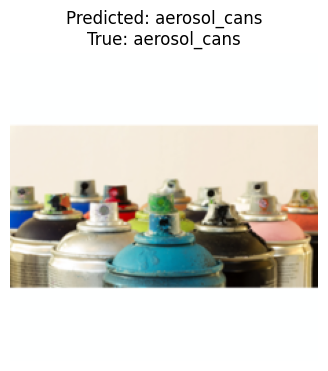

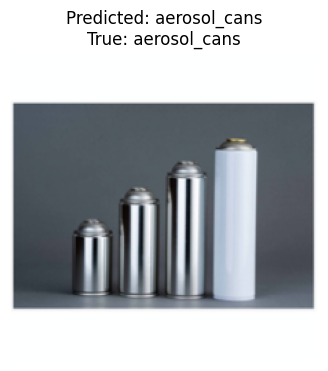

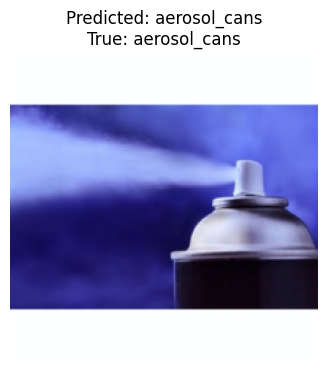

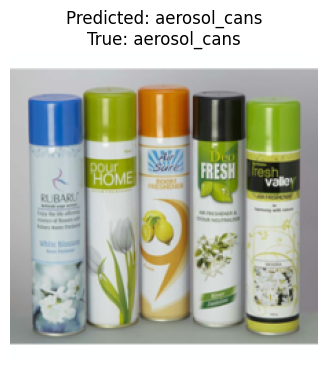

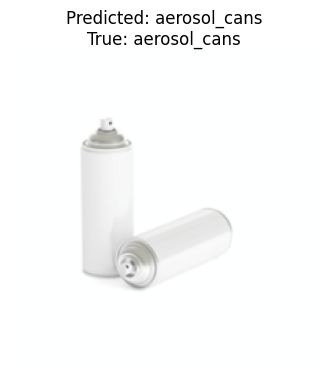

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_predictions(model, data_loader, class_names, device, num_images=5):
    """
    Visualizes model predictions on a few images from the data loader.
    """
    model.eval()
    images_so_far = 0

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs = inputs.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for i in range(inputs.size(0)):
                images_so_far += 1
                plt.figure(figsize=(4,4))
                img = inputs.cpu().data[i]
                img = img.numpy().transpose((1, 2, 0))
                img = np.clip(img * np.array([0.229, 0.224, 0.225]) +
                              np.array([0.485, 0.456, 0.406]), 0, 1)
                plt.imshow(img)
                plt.title(f"Predicted: {class_names[preds[i]]}\nTrue: {class_names[labels[i]]}")
                plt.axis('off')
                plt.show()

                if images_so_far == num_images:
                    return

# Get class names
class_names = train_dataset_cls.classes

# Visualize predictions on validation set
visualize_predictions(model_cls, val_loader_cls, class_names, device, num_images=5)

In [13]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

predicted_labels = []
true_labels = []

with torch.no_grad():
     for inputs, labels in val_loader_cls:
         inputs = inputs.to(device)
         outputs = model_cls(inputs)
         _, predicted = torch.max(outputs, 1)
         predicted_labels.extend(predicted.cpu().numpy())
         true_labels.extend(labels.cpu().numpy())

predicted_labels = np.array(predicted_labels)
true_labels = np.array(true_labels)

# Create classification report
cr = classification_report(true_labels, predicted_labels, target_names=class_names)
print("\nClassification Report:")
print(cr)


Classification Report:
                            precision    recall  f1-score   support

              aerosol_cans       0.94      0.97      0.95        92
        aluminum_food_cans       0.60      0.56      0.58        89
        aluminum_soda_cans       0.84      0.84      0.84        96
           cardboard_boxes       0.60      0.56      0.58        91
       cardboard_packaging       0.58      0.59      0.59        86
                  clothing       0.90      0.92      0.91        93
            coffee_grounds       0.93      0.95      0.94        88
disposable_plastic_cutlery       1.00      0.96      0.98        90
                 eggshells       0.96      0.93      0.95        88
                food_waste       0.93      0.97      0.95        92
    glass_beverage_bottles       0.91      0.91      0.91        94
 glass_cosmetic_containers       0.92      0.98      0.95        91
           glass_food_jars       0.92      0.90      0.91        93
                 magazi